In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Could not save font_manager cache [Errno 13] Permission denied: 'C:\\Users\\91720\\.matplotlib\\fontlist-v390.json.matplotlib-lock'


In [4]:
# Load dataset
# Load dataset
columns = ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight', 
           'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']
df = pd.read_csv("abalone/abalone.data", names=columns)
df.head()


# Binary classification: Young (<=10) = 0, Old (>10) = 1
df['Age_Class'] = (df['Rings'] > 10).astype(int)

# Feature selection (you can try more features or PCA for improvement)
X = df[['Length', 'Diameter', 'Height', 'WholeWeight', 
        'ShuckedWeight', 'VisceraWeight', 'ShellWeight']]
y = df['Age_Class']

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [6]:
# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability of class '1'

In [8]:
# Use class predictions for forced MSE/R² (less meaningful)
mse_class = mean_squared_error(y_test, y_pred)
r2_class = r2_score(y_test, y_pred)

# Use probabilities for more nuanced error (closer to regression idea)
mse_prob = mean_squared_error(y_test, y_pred_prob)
r2_prob = r2_score(y_test, y_pred_prob)

print(f"\nForced Metrics (using class labels):")
print(f"MSE (labels): {mse_class:.4f}")
print(f"R² Score (labels): {r2_class:.4f}")

print(f"\nOptional Metrics (using probabilities):")
print(f"MSE (probabilities): {mse_prob:.4f}")
print(f"R² Score (probabilities): {r2_prob:.4f}")


Forced Metrics (using class labels):
MSE (labels): 0.2165
R² Score (labels): 0.0210

Optional Metrics (using probabilities):
MSE (probabilities): 0.1477
R² Score (probabilities): 0.3319


In [9]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [10]:
# Results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(class_report)

Accuracy: 0.7835
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       560
           1       0.70      0.61      0.65       276

    accuracy                           0.78       836
   macro avg       0.76      0.74      0.75       836
weighted avg       0.78      0.78      0.78       836



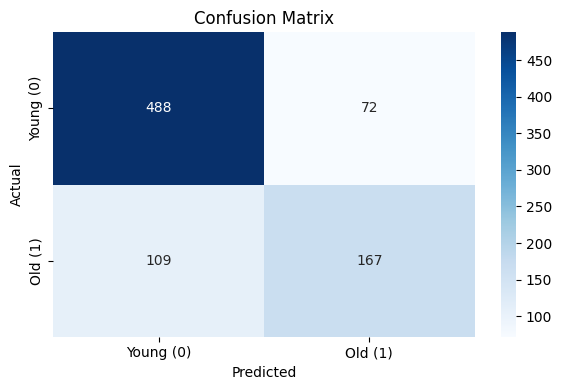

In [11]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Young (0)', 'Old (1)'],
            yticklabels=['Young (0)', 'Old (1)'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


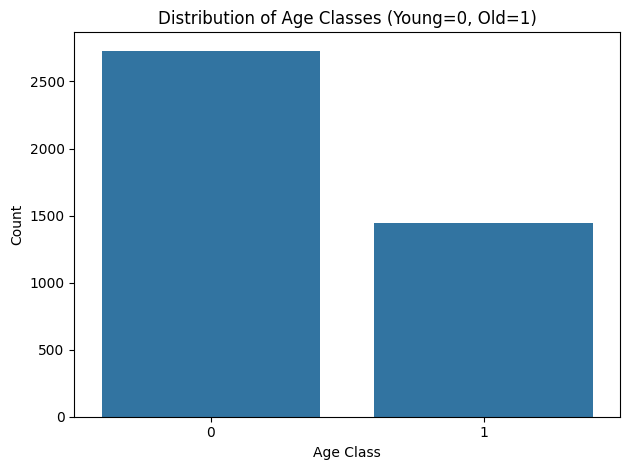

In [12]:
# Class Distribution Bar Plot
sns.countplot(x='Age_Class', data=df)
plt.title("Distribution of Age Classes (Young=0, Old=1)")
plt.xlabel("Age Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


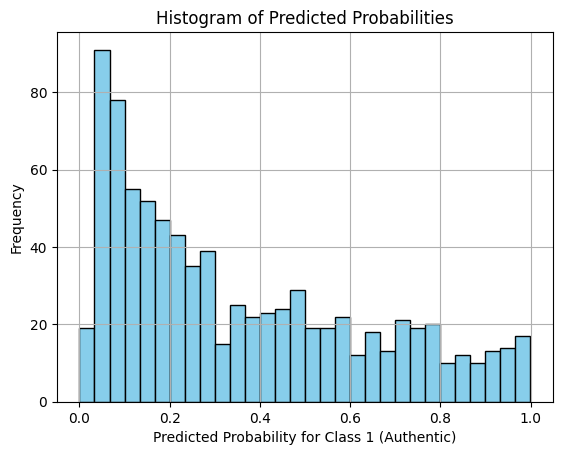

In [13]:
#Predicted probabilties histogram
plt.hist(y_pred_prob, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Predicted Probability for Class 1 (Authentic)')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.grid(True)
plt.show()
